# Recibe la señal de audio

(12838912,)


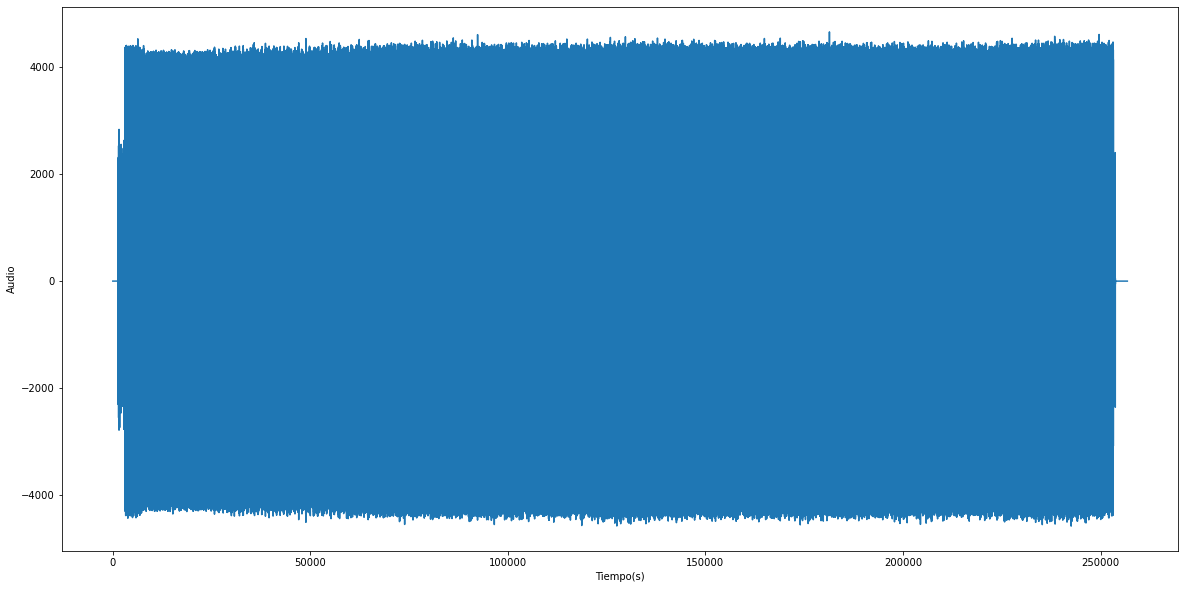

In [5]:
# Hay 2 formas de recibir la señal, por input o bien abriendo un archivo de sonido

#Desde un sonido, analizar fft 
import scipy.io.wavfile as waves
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fourier

audio_completo='sonidoFinal5min.wav'

Fs,data=waves.read(audio_completo)
Audio_m=data[:,0]

header=[12000,12000,12000,13000,13000,13000,12000,12000,12000,13000,13000,13000]
def generacionfrec_ventanas(audio,ts):
    #Inicia filtro (se debe usar sincronización)
    #Quitar los primeros elementos que poseen ceros del arreglo
    aux=audio
    #Filtro de Header
    while aux[0]<200:
        aux=aux[1:]

    tamaño_ventana=int(44100*ts)
    frecuencia=[]
    
    # Detección y almacenamiento del texto
    while len(aux)>tamaño_ventana:
        #Obtener el FFT de la primera ventana tomando los primeros 44100*0.08 elementos
        ventana=aux[0:tamaño_ventana]
        L=len(ventana)
        #Fourier
        gk=fourier.fft(ventana)
        M_gk=abs(gk)
        M_gk=M_gk[0:L//2]
        F=(Fs/L)*np.arange(0,L//2)

        #obtener el maximo de M_gk y buscar su pareja en el eje x

        max=np.max(M_gk)
        frecuencia.append(F[np.where(M_gk==max)])
        aux=aux[tamaño_ventana:]
        #Si se llega al header, implica que se terminó la transmisión del texto
        if len(frecuencia)>13:
            if np.mean(frecuencia[-12:])>12300:
                break
    #Filtramos los valores del header que quedaron en el header
    frec_text=frecuencia[frecuencia<10000]
    frec_r=[]
    frec_g=[]
    frec_b=[]
    #Eliminamos audio vacio del final
    while aux[-1]<100:
        aux=aux[:-1]
    # Detección y almacenamiento de la imagen
    while len(aux)>=tamaño_ventana:
        
        #Obtener el FFT de la ventana 
        ventana=aux[0:tamaño_ventana]
        L=len(ventana)
        #Fourier
        gk=fourier.fft(ventana)
        M_gk=abs(gk)
        M_gk=M_gk[0:L//2]
        F=(Fs/L)*np.arange(0,L//2)

        #obtener los 3 máximos de M_gk y buscar su pareja en el eje x

        max=np.sort(M_gk)[-3:]
        lim_r=[300,3335]
        lim_g=[3336,6685]
        lim_b=[6686,9900]
        for i in max:
            a=F[np.where(M_gk==i)]
            if lim_r[0] <= a <= lim_r[1]:
                frec_r.append(a)
            if lim_g[0] <= a <= lim_g[1]:
                frec_g.append(a)
            if lim_b[0] <= a <= lim_b[1]:
                frec_b.append(a)

        frecuencia.append(F[np.where(M_gk==max)])
        aux=aux[tamaño_ventana:]




#generacionfrec_ventanas(Audio_m,0.08)
n=0.02*np.arange(0,len(Audio_m))
#fig,ax=plt.subplots()
plt.figure(figsize=(20,10))
plt.plot(n,Audio_m)
plt.xlabel('Tiempo(s)')
plt.ylabel('Audio')
plt.show()
#fig,bx=plt.subplots()
# plt.figure(figsize=(20,10))
# plt.plot(F,M_gk)
# plt.xlabel('Frecuencia(Hz)', fontsize='14')
# plt.ylabel('Amplitud FFT', fontsize='14')
# plt.xlim(0,2000)
# plt.show()


In [11]:
a=[12000,12000,12000,13000,13000,13000,12000,12000,12000,13000,13000,13000]
a=a[:-1]
print(a)

[12000, 12000, 12000, 13000, 13000, 13000, 12000, 12000, 12000, 13000, 13000]
